In [1]:
import os

In [2]:
original_dir='C:/Users/DELL/Downloads/kaggle-catsvsdogs/PetImages'
base_dir='C:/Users/DELL/Downloads/cats_and_dogs'
os.mkdir(base_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/DELL/Downloads/cats_and_dogs'

In [3]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/DELL/Downloads/cats_and_dogs\\train'

In [4]:
val_dir=os.path.join(base_dir,'val')
os.mkdir(val_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/DELL/Downloads/cats_and_dogs\\val'

In [5]:
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/DELL/Downloads/cats_and_dogs\\test'

In [6]:
train_cats=os.path.join(train_dir,'cats')
os.mkdir(train_cats)
train_dogs=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs)
val_cats=os.path.join(val_dir,'cats')
os.mkdir(val_cats)
val_dogs=os.path.join(val_dir,'dogs')
os.mkdir(val_dogs)
test_cats=os.path.join(test_dir,'cats')
os.mkdir(test_cats)
test_dogs=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/DELL/Downloads/cats_and_dogs\\train\\cats'

In [7]:
org_dir='C:/Users/DELL/Downloads/dogs-vs-cats/train/train'

In [8]:
fnames=['cat.{}.jpg'.format(i) for i in range (1500)]

In [9]:
import shutil
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(train_cats,fname)
    shutil.copyfile(src,dst)

In [10]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(train_dogs,fname)
    shutil.copyfile(src,dst)

NameError: name 'train_dogs' is not defined

In [12]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(val_cats,fname)
    shutil.copyfile(src,dst)

NameError: name 'val_cats' is not defined

In [13]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(val_dogs,fname)
    shutil.copyfile(src,dst)

NameError: name 'val_dogs' is not defined

In [14]:
fnames=['cat.{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(test_cats,fname)
    shutil.copyfile(src,dst)

NameError: name 'test_cats' is not defined

In [15]:
fnames=['dog.{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
    src=os.path.join(org_dir,fname)
    dst=os.path.join(test_dogs,fname)
    shutil.copyfile(src,dst)

NameError: name 'test_dogs' is not defined

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [20]:
#to decode the jpeg content to rgb grids of pixels
#to rescale the pixel values (between 0 and 255) to the [0,1]interval

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_generator=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history=model.fit_generator(train_generator,steps_per_epoch=50,epochs=6,validation_data=val_generator,validation_steps=50)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
50/50 [==============================] - 24s 466ms/step - loss: 0.7025 - acc: 0.4846 - val_loss: 0.6849 - val_acc: 0.6020
Epoch 2/6
50/50 [==============================] - 24s 484ms/step - loss: 0.6842 - acc: 0.5663 - val_loss: 0.6754 - val_acc: 0.6020
Epoch 3/6
50/50 [==============================] - 25s 494ms/step - loss: 0.6790 - acc: 0.5631 - val_loss: 0.6647 - val_acc: 0.6290
Epoch 4/6
50/50 [==============================] - 26s 512ms/step - loss: 0.6497 - acc: 0.6439 - val_loss: 0.6648 - val_acc: 0.5790
Epoch 5/6
50/50 [==============================] - 26s 514ms/step - loss: 0.6420 - acc: 0.6271 - val_loss: 0.6254 - val_acc: 0.6700
Epoch 6/6
50/50 [==============================] - 29s 577ms/step - loss: 0.6005 - acc: 0.7036 - val_loss: 0.6070 - val_acc: 0.6580


In [27]:
model.save('cats_and_dogs.h5')

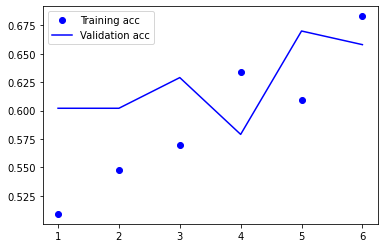

In [28]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()
plt.show()

In [22]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [23]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
from keras.preprocessing.image import ImageDataGenerator
conv_base.trainable=False
train_datagene=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagene=ImageDataGenerator(rescale=1./255)#validation data should not be augmented

In [25]:
train_generator=train_datagene.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_generator=test_datagene.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [ ]:
#history=model.fit_generator(train_generator,steps_per_epoch=50,epochs=30,validation_data=val_generator,validation_steps=50)